In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal.windows import boxcar, hann, blackman, kaiser
from scipy.optimize import fsolve


In [42]:
# Original Parameters
sampling_rate =  1000 # 1000 Hz
duration1 = 1  # seconds
N = duration1 * 1000 #number of samples
t = np.linspace(0, duration1, int(N), endpoint=False)
term1 = 100 * np.sin(2*np.pi*100*t)
term2 = 3 * np.sin(2*np.pi*98*t + np.pi/4)
term3 = 50 * np.sin(2*np.pi*95*t + np.pi/4)
signal = term1 + term2 + term3

#https://www.youtube.com/watch?v=ETgDTKKz_dQ
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html


In [43]:
# Generate the rectangular (boxcar) window using numpy
rectangular_window = boxcar(N)

# Generate other window functions for comparison
hann_window = hann(N)
blackman_window = blackman(N)
kaiser_window2 = kaiser(N, beta=2)  # Kaiser window with beta=2
kaiser_window10 = kaiser(N, beta=10)

# Apply each window to the signal
windowed_signals = {
    "Rectangular": signal * rectangular_window,
    "Hann": signal * hann_window,
    "Blackman": signal * blackman_window,
    "Kaiser (beta=2)": signal * kaiser_window2,
    "Kaiser (beta=10)": signal * kaiser_window10,
}

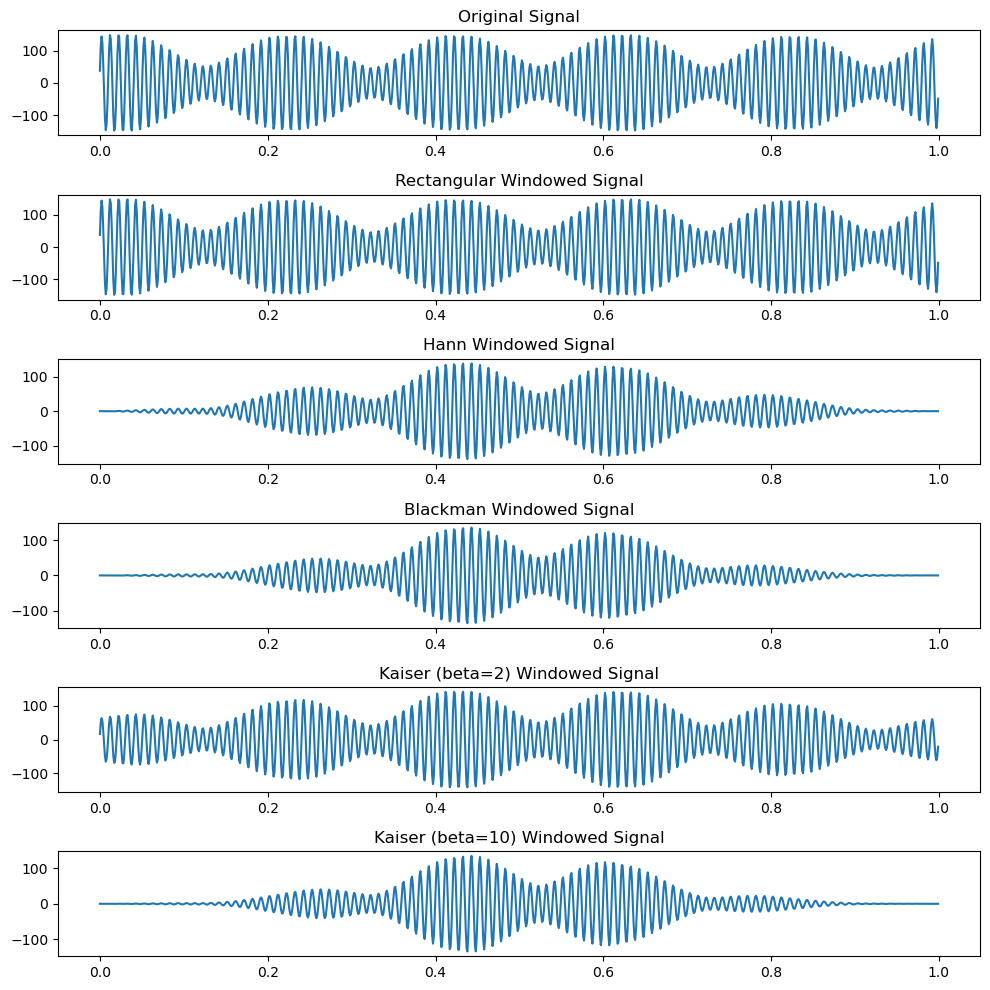

In [44]:
# Plotting
fig, axs = plt.subplots(len(windowed_signals) + 1, 1, figsize=(10, 10))
axs[0].plot(t, signal)
axs[0].set_title('Original Signal')

for i, (window_name, windowed_signal) in enumerate(windowed_signals.items(), start=1):
    axs[i].plot(t, windowed_signal, label=window_name)
    axs[i].set_title(f'{window_name} Windowed Signal')
    #axs[i].legend()

plt.tight_layout()
plt.show()

In [45]:
M = N - 1
pi = sampling_rate/2 #adjusting for frequency instead of radian
rect_res = (4*pi)/(M+1)
hann_res = (8*pi)/M
blackman_res = (12*pi)/M

print("Solved Rectangular Resolution: {:.6f}, "  \
      "Solved Hann Resolution: {:.6f}, "  \
      "Solved Blackman Resolution: {:.6f}".format(rect_res,hann_res,blackman_res))

Solved Rectangular Resolution: 2.000000, Solved Hann Resolution: 4.004004, Solved Blackman Resolution: 6.006006


In [46]:
# Numerical approach for solving Asl2
# Define the equation to solve
def asl2_equation(Asl2, beta2):
    return 0.76609 * (Asl2 - 13.26)**0.4 + 0.09834 * (Asl2 - 13.26) - beta2
# Given beta2 value
beta2_value = 2  # Example value, replace with the actual beta2 value you have
# Initial guess for Asl2
initial_guess = 20.0  # This can be adjusted based on the expected range of Asl2
# Solve for Asl2
Asl2_solution = fsolve(asl2_equation, initial_guess, args=(beta2_value))
Asl2 = Asl2_solution[0]
print("Solved Asl2: {:.6f}".format(Asl2))

Solved Asl2: 18.493960


In [47]:
#Simple approach for solving Asl10 (rearrange eqn)
beta10 = 10
Asl10 = (beta10 / 0.12438) - 6.3
print("Solved Asl10: {:.6f}".format(Asl10))

Solved Asl10: 74.098778


In [48]:
def ml_eqn(Asl, L):
    return (24*pi*(Asl+12))/(155*(L+1))
ml2 = ml_eqn(Asl2, N)
ml10 = ml_eqn(Asl10, N)

print("Solved ml2: {:.6f}, Solved ml10: {:.6f}".format(ml2, ml10))

Solved ml2: 2.358464, Solved ml10: 6.659053


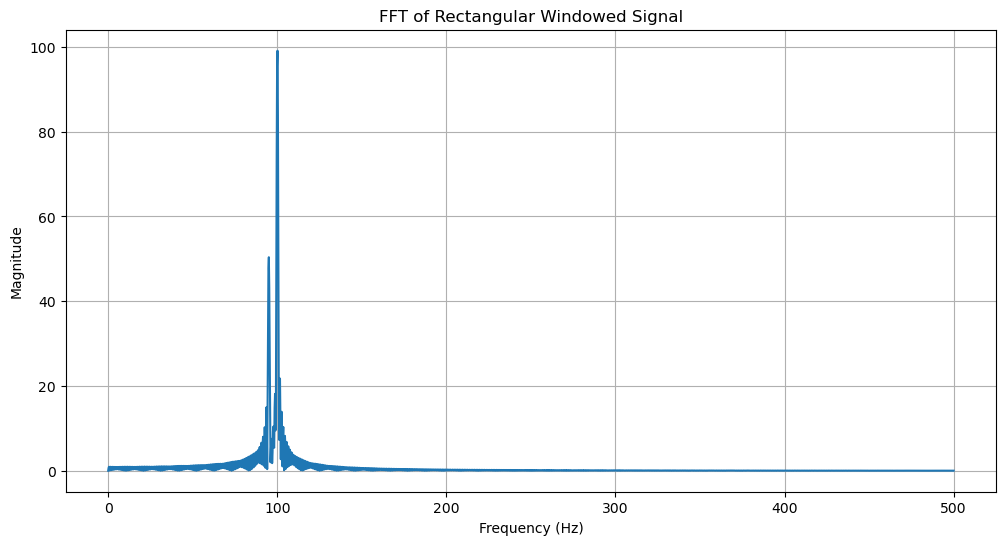

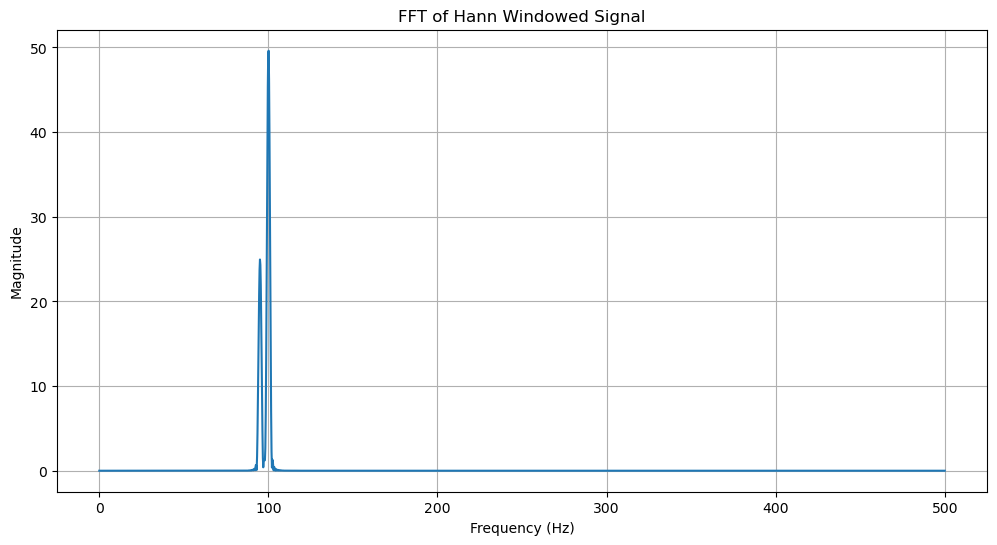

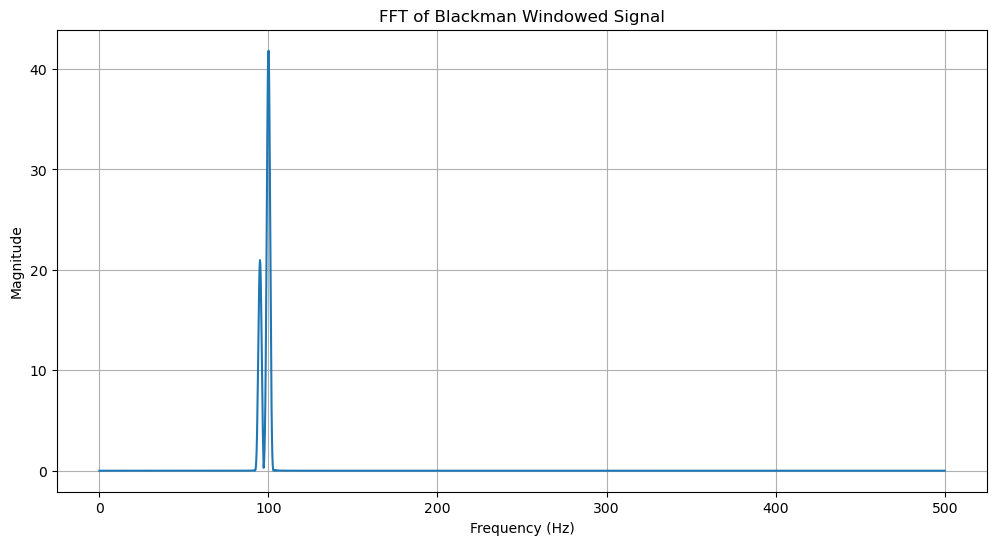

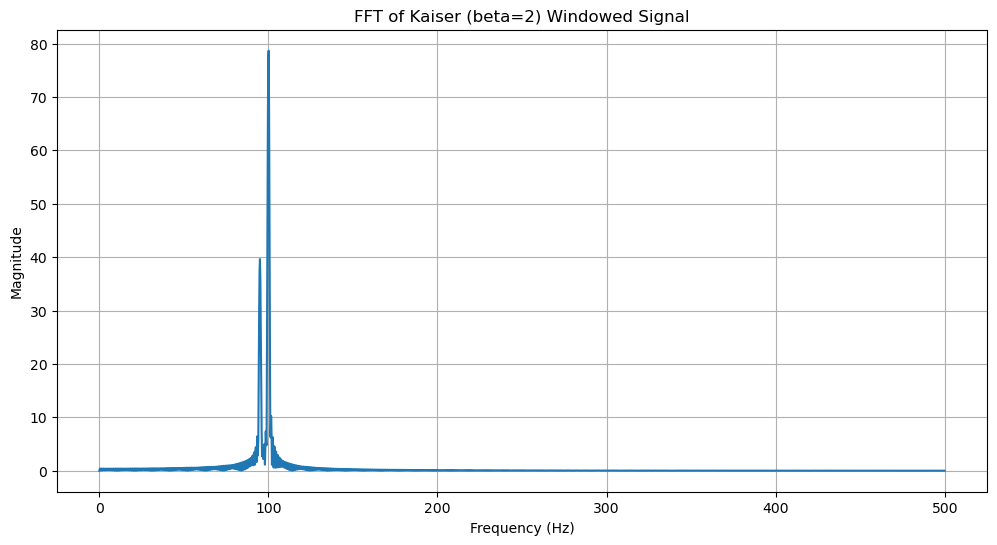

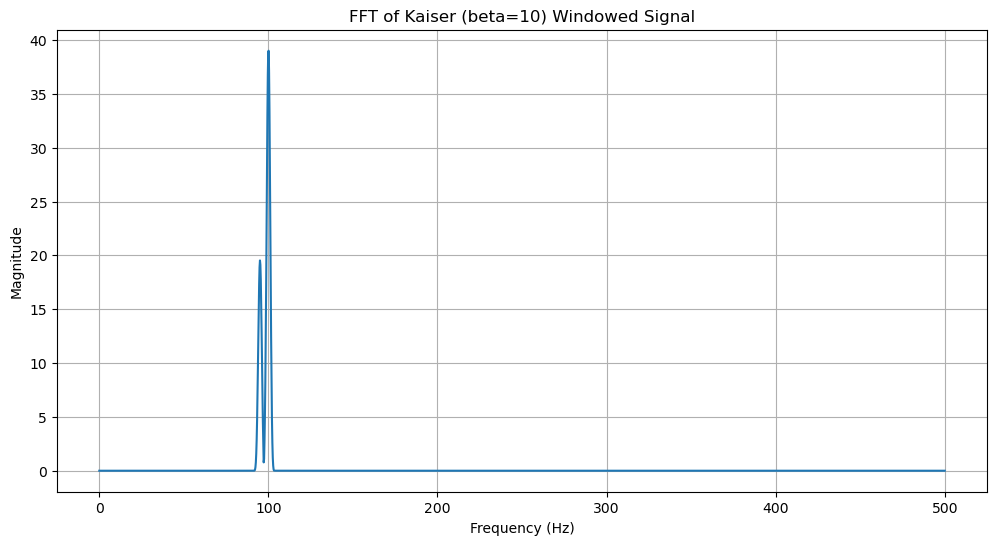

In [49]:
windowed_signal_mag = []
freq_list = []
def plot_fft(signal, sampling_rate, title):
    fft = np.abs((np.fft.fft(signal, 4096)) / (len(signal) / 2))
    out = fft[:len(fft) // 2]
    freq = np.linspace(0, sampling_rate / 2, len(out))
    windowed_signal_mag.append(out)
    freq_list.append(freq)

    plt.figure(figsize=(12, 6))  # Create a new figure for each plot
    plt.plot(freq, out)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()  # Show each plot individually

for window_name, windowed_signal in windowed_signals.items():
    plot_fft(windowed_signal, sampling_rate, f'FFT of {window_name} Windowed Signal')
# magnitude of the rectangular window will be 50000 since the N * magnitude is 100,000 but need to be divided by 2 since only taking posiitive

In [50]:
term1_signals = [
    term1 * rectangular_window, 
    term1 * hann_window,
    term1 * blackman_window,
    term1 * kaiser_window2,
    term1 * kaiser_window10,
]

term2_signals = [
    term2 * rectangular_window,
    term2 * hann_window,
    term2 * blackman_window,
    term2 * kaiser_window2,
    term2 * kaiser_window10,
]

term3_signals = [
    term3 * rectangular_window,
    term3 * hann_window,
    term3 * blackman_window,
    term3 * kaiser_window2,
    term3 * kaiser_window10,
]

Rectangular


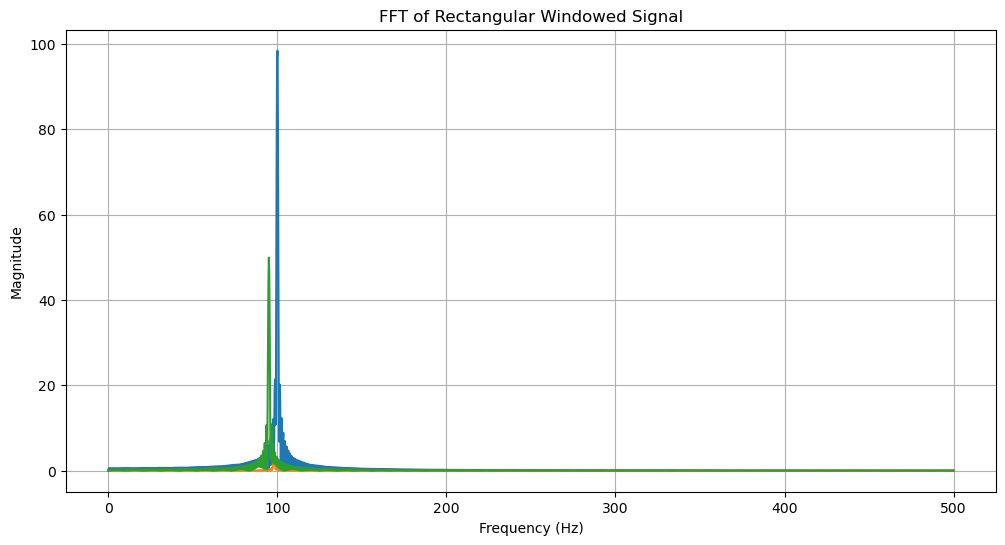

Hann


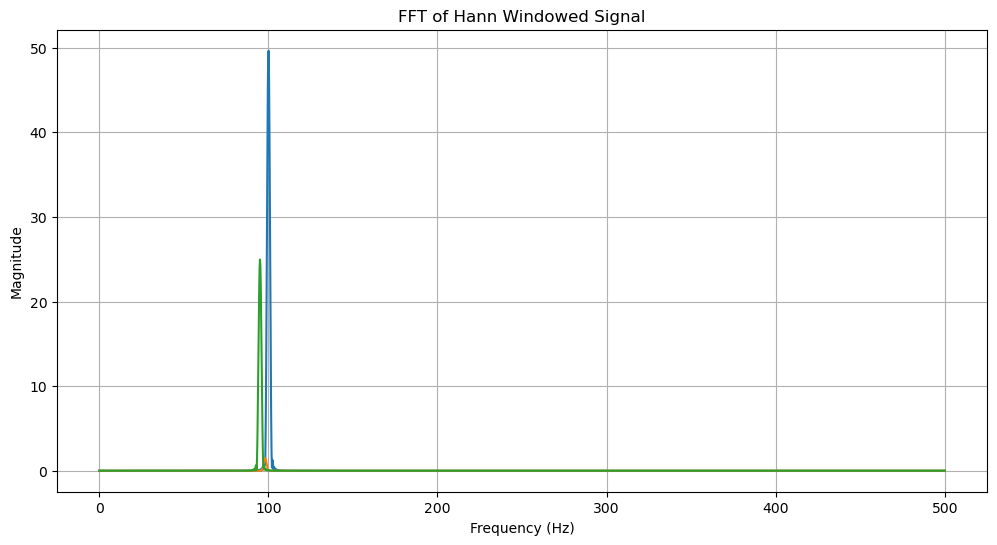

Blackman


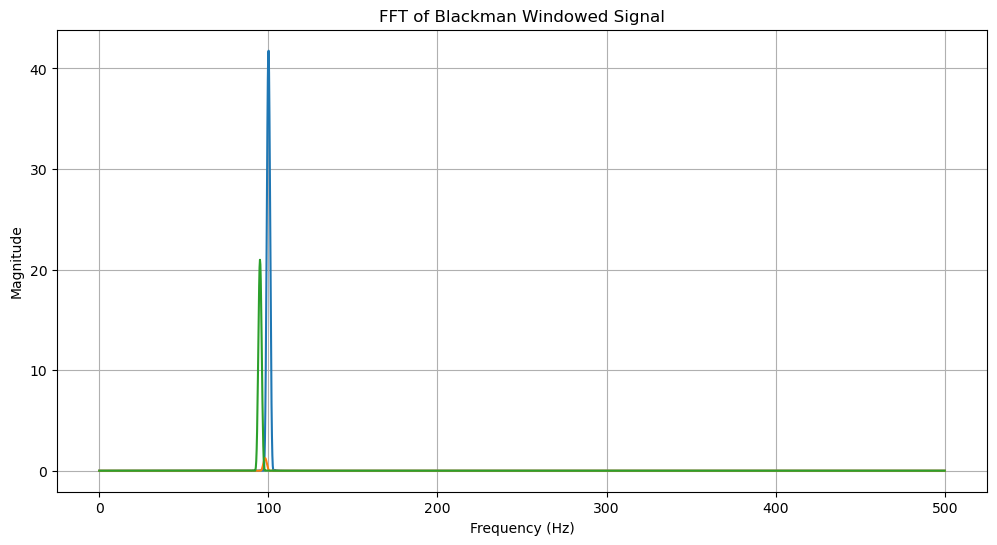

Kaiser (beta=2)


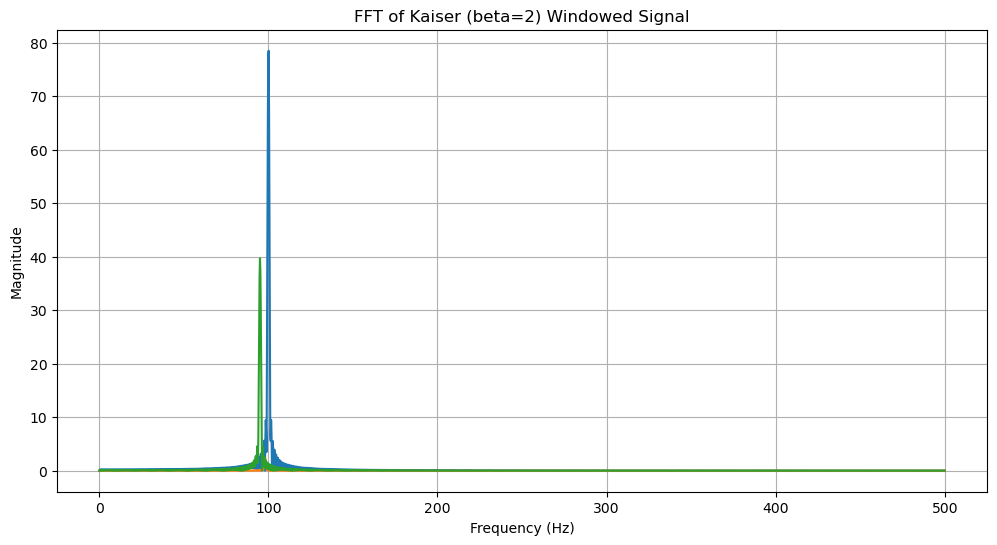

Kaiser (beta=10)


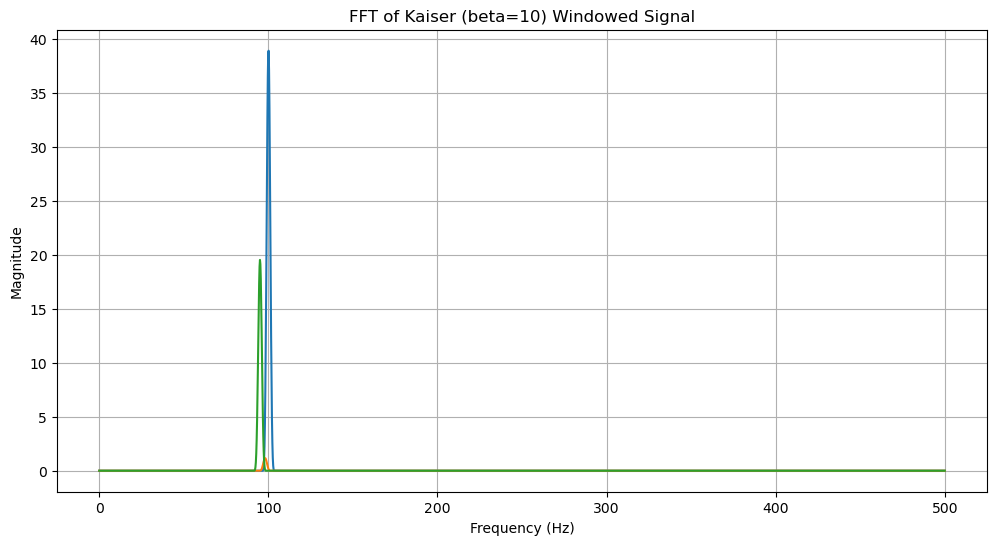

In [51]:
#FIXME!! Want to make separate functions for each term

def get_fft(signal, sampling_rate):
    fft = np.abs((np.fft.fft(signal, 4096)) / (len(signal) / 2))
    out = fft[:len(fft) // 2]
    freq = np.linspace(0, sampling_rate / 2, len(out))
    return freq, out
def plot_separate(signal1,signal2,signal3, sampling_rate, title):
    freq1, out1 = get_fft(signal1, sampling_rate)
    freq2, out2 = get_fft(signal2, sampling_rate)
    freq3, out3 = get_fft(signal3, sampling_rate)
    plt.figure(figsize=(12, 6))  # Create a new figure for each plot
    plt.plot(freq1, out1)
    plt.plot(freq2, out2)
    plt.plot(freq3, out3)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()  # Show each plot individually


#do a nested for loop!
for i, window_name in zip(range(0, 5), windowed_signals):
    print(window_name)
    plot_separate(term1_signals[i], term2_signals[i], term3_signals[i],sampling_rate, f'FFT of {window_name} Windowed Signal')
# magnitude of the rectangular window will be 50000 since the N * magnitude is 100,000 but need to be divided by 2 since only taking posiitive


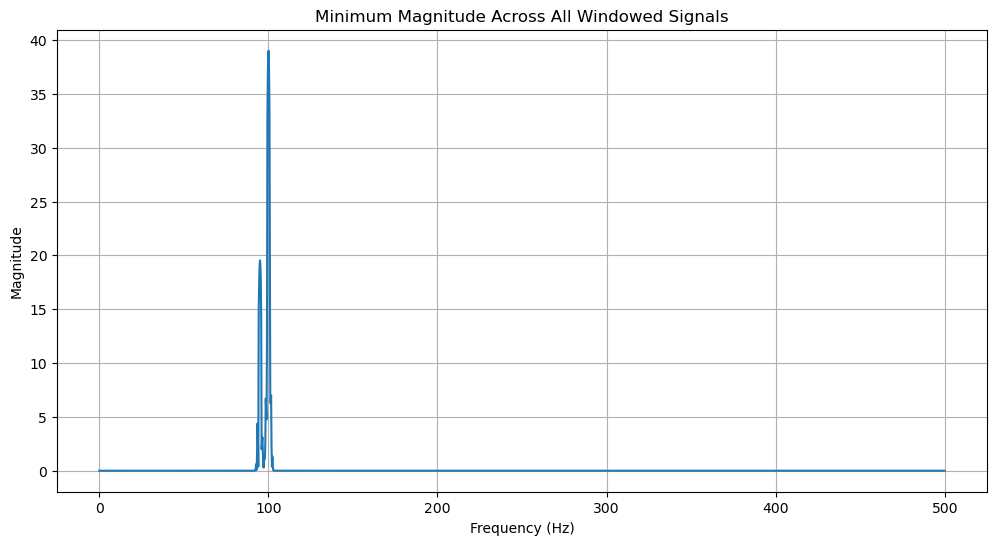

In [52]:
min_magnitudes = np.min((windowed_signal_mag), axis=0)
plt.figure(figsize=(12, 6))
plt.plot(freq_list[0], min_magnitudes)
plt.title('Minimum Magnitude Across All Windowed Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()